In [1]:
# Load dataset
import pandas as pd
df_kath = pd.read_csv("solar-measurements_nepal_kathmandu_wb-esmap_qc.csv")
df_kath.head()

C:\Users\Acer Aspire\AppData\Local\Temp\ipykernel_21328\2075115044.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_kath = pd.read_csv("solar-measurements_nepal_kathmandu_wb-esmap_qc.csv")


,time,ghi,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,rain,sensor_cleaning,comments
0,2018-07-01 00:01,0.0,0.0,0.0,23.2,89.4,0.0,0.0,0.0,0.0,862.1,0.0,0,NaN
1,2018-07-01 00:02,0.0,0.0,0.0,23.2,89.5,0.0,0.4,0.0,271.6,862.1,0.0,0,NaN
2,2018-07-01 00:03,0.0,0.0,0.0,23.2,89.6,0.0,0.7,0.0,276.5,862.1,0.0,0,NaN
3,2018-07-01 00:04,0.0,0.0,0.0,23.2,89.5,0.2,1.1,0.0,276.6,862.1,0.0,0,NaN
4,2018-07-01 00:05,0.0,0.0,0.0,23.2,89.5,0.3,1.6,2.2,269.2,862.1,0.0,0,NaN


In [2]:
df_kath.tail()

,time,ghi,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,rain,sensor_cleaning,comments
1052635,2020-06-30 23:56,0.0,0.0,0.0,22.2,92.3,0.0,0.0,0.0,0.0,863.6,0.0,0,NaN
1052636,2020-06-30 23:57,0.0,0.0,0.0,22.2,92.3,0.0,0.4,0.0,188.2,863.6,0.0,0,NaN
1052637,2020-06-30 23:58,0.0,0.0,0.0,22.2,92.3,0.0,0.0,0.0,0.0,863.6,0.0,0,NaN
1052638,2020-06-30 23:59,0.0,0.0,0.0,22.2,92.4,0.3,1.3,0.0,182.8,863.6,0.0,0,NaN
1052639,2020-07-01 00:00,0.0,0.0,0.0,22.1,92.5,0.0,0.7,0.0,184.8,863.5,0.0,0,NaN


In [3]:
df_kath['time'] = pd.to_datetime(df_kath['time'])
df_kath = df_kath.sort_values('time')   # ensure chronological order

In [4]:
start1 = "2018-07-01 00:01"
end1   = "2019-01-01 00:01"

In [5]:
start2 = "2019-01-01 00:00"
end2   = "2020-07-01 00:00"

In [6]:
part1 = df_kath[(df_kath['time'] >= start1) & (df_kath['time'] <= end1)]
part2 = df_kath[(df_kath['time'] >= start2) & (df_kath['time'] <= end2)]

In [7]:
# Difference between consecutive rows
part1_diff = part1['time'].diff()
part2_diff = part2['time'].diff()

print(part1_diff.value_counts().head())
print(part2_diff.value_counts().head())

time
0 days 00:01:00    264960
Name: count, dtype: int64
time
0 days 00:01:00    787680
Name: count, dtype: int64


In [8]:
part2_diff.head()

264959               NaT
264960   0 days 00:01:00
264961   0 days 00:01:00
264962   0 days 00:01:00
264963   0 days 00:01:00
Name: time, dtype: timedelta64[ns]

In [9]:
df_kath['time'] = pd.to_datetime(df_kath['time'])
is_chronological = df_kath['time'].is_monotonic_increasing
print("Is data in chronological order? ", is_chronological)

Is data in chronological order?  True


In [10]:
df_kath['time'] = pd.to_datetime(df_kath['time'])
df_kath = df_kath.sort_values('time')
diffs = df_kath['time'].diff().dropna()
print(diffs.head(10))

1    0 days 00:01:00
2    0 days 00:01:00
3    0 days 00:01:00
4    0 days 00:01:00
5    0 days 00:01:00
6    0 days 00:01:00
7    0 days 00:01:00
8    0 days 00:01:00
9    0 days 00:01:00
10   0 days 00:01:00
Name: time, dtype: timedelta64[ns]


In [11]:
is_equidistant = diffs.nunique() == 1
print("Are timestamps equidistant?", is_equidistant)

Are timestamps equidistant? True


In [12]:
df_kath.shape

(1052640, 14)

In [13]:
df_kath["time"].value_counts()

time
2020-06-30 23:44:00    1
2020-06-30 23:43:00    1
2020-06-30 23:42:00    1
2020-06-30 23:41:00    1
2020-06-30 23:40:00    1
                      ..
2018-07-01 00:05:00    1
2018-07-01 00:04:00    1
2018-07-01 00:03:00    1
2018-07-01 00:02:00    1
2018-07-01 00:01:00    1
Name: count, Length: 1052640, dtype: int64

In [14]:
import pandas as pd
# Load dataset
df_kath = pd.read_csv("solar-measurements_nepal_kathmandu_wb-esmap_qc.csv")
# Check original shape
print(df_kath.shape)   # (1052640, 14)
# Split sizes
size1 = 264960
size2 = 787680   # Note: size1 + size2 = 1,052,640
# Split the dataframe
df_part1 = df_kath.iloc[:size1, :]
df_part2 = df_kath.iloc[size1:size1+size2, :]
# Check shapes
print(df_part1.shape)  # (528489, 14)
print(df_part2.shape)  # (524151, 14)

C:\Users\Acer Aspire\AppData\Local\Temp\ipykernel_21328\4136940106.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_kath = pd.read_csv("solar-measurements_nepal_kathmandu_wb-esmap_qc.csv")


(1052640, 14)
(264960, 14)
(787680, 14)


In [15]:
df_part1.to_csv("kathmandu_part1.csv", index=False)
df_part2.to_csv("kathmandu_part2.csv", index=False)

In [16]:
df_KTM = pd.read_csv("Kathmandu_part2.csv")
df_KTM.head()

C:\Users\Acer Aspire\AppData\Local\Temp\ipykernel_21328\990475223.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_KTM = pd.read_csv("Kathmandu_part2.csv")


,time,ghi,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,rain,sensor_cleaning,comments
0,2019-01-01 00:01,0.0,0.0,0.0,6.3,80.5,0.0,0.0,0.0,0.0,873.3,0.0,0,NaN
1,2019-01-01 00:02,0.0,0.0,0.0,6.4,80.5,0.0,0.0,0.0,0.0,873.3,0.0,0,NaN
2,2019-01-01 00:03,0.0,0.0,0.0,6.4,80.4,0.0,0.0,0.0,0.0,873.3,0.0,0,NaN
3,2019-01-01 00:04,0.0,0.0,0.0,6.4,80.4,0.0,0.0,0.0,0.0,873.3,0.0,0,NaN
4,2019-01-01 00:05,0.0,0.0,0.0,6.3,80.2,0.0,0.0,0.0,0.0,873.3,0.0,0,NaN


In [17]:
df_KTM.tail()

,time,ghi,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,rain,sensor_cleaning,comments
787675,2020-06-30 23:56,0.0,0.0,0.0,22.2,92.3,0.0,0.0,0.0,0.0,863.6,0.0,0,NaN
787676,2020-06-30 23:57,0.0,0.0,0.0,22.2,92.3,0.0,0.4,0.0,188.2,863.6,0.0,0,NaN
787677,2020-06-30 23:58,0.0,0.0,0.0,22.2,92.3,0.0,0.0,0.0,0.0,863.6,0.0,0,NaN
787678,2020-06-30 23:59,0.0,0.0,0.0,22.2,92.4,0.3,1.3,0.0,182.8,863.6,0.0,0,NaN
787679,2020-07-01 00:00,0.0,0.0,0.0,22.1,92.5,0.0,0.7,0.0,184.8,863.5,0.0,0,NaN


In [18]:
df_KTM["dhi"].value_counts()

dhi
0.0      395930
1.1         429
0.8         406
1.5         347
1.9         343
          ...  
653.3         1
696.2         1
733.6         1
734.6         1
698.3         1
Name: count, Length: 6857, dtype: int64

In [19]:
df_KTM.shape

(787680, 14)

In [20]:
df_KTM.isnull().sum()

time                               0
ghi                                0
dni                                0
dhi                                0
air_temperature                    0
relative_humidity                  0
wind_speed                         0
wind_speed_of_gust                 0
wind_from_direction_st_dev         0
wind_from_direction                0
barometric_pressure                0
rain                               0
sensor_cleaning                    0
comments                      783726
dtype: int64

In [21]:
import pandas as pd
# ---------------------------
# LOAD THE DATA
# ---------------------------
df_tet = pd.read_csv("Tetuan_City_power_consumption_1min.csv")

In [22]:
df_KTM.shape

(787680, 14)

In [23]:
df_tet.shape

(524151, 9)

In [24]:
df_tet.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.5590,73.80,0.083,0.0510,0.1190,34055.696200,16128.875380,20240.963860
1,2017-01-01 00:01:00,6.5445,73.87,0.083,0.0529,0.1156,33631.594934,16453.495441,20229.975908
2,2017-01-01 00:02:00,6.5300,73.94,0.083,0.0548,0.1122,33207.493668,16778.115502,20218.987956
3,2017-01-01 00:03:00,6.5155,74.01,0.083,0.0567,0.1088,32783.392402,17102.735563,20208.000004
4,2017-01-01 00:04:00,6.5010,74.08,0.083,0.0586,0.1054,32359.291136,17427.355624,20197.012052


In [25]:
df_tet["DateTime"].value_counts

<bound method IndexOpsMixin.value_counts of 0         2017-01-01 00:00:00
1         2017-01-01 00:01:00
2         2017-01-01 00:02:00
3         2017-01-01 00:03:00
4         2017-01-01 00:04:00
                 ...         
524146    2017-12-30 23:46:00
524147    2017-12-30 23:47:00
524148    2017-12-30 23:48:00
524149    2017-12-30 23:49:00
524150    2017-12-30 23:50:00
Name: DateTime, Length: 524151, dtype: object>

In [26]:
df_tet.tail()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
524146,2017-12-30 23:46:00,6.6512,73.66,0.0806,0.0636,0.1022,28593.155894,24310.033754,13412.340936
524147,2017-12-30 23:47:00,6.6334,73.77,0.0807,0.0632,0.1044,28532.319393,24246.333233,13395.630252
524148,2017-12-30 23:48:00,6.6156,73.88,0.0808,0.0628,0.1066,28471.482892,24182.632712,13378.919568
524149,2017-12-30 23:49:00,6.5978,73.99,0.0809,0.0624,0.1088,28410.646391,24118.932191,13362.208884
524150,2017-12-30 23:50:00,6.5800,74.10,0.0810,0.0620,0.1110,28349.809890,24055.231670,13345.498200


In [27]:
substation_capacity_95 = df_tet[['Zone 1 Power Consumption',
                               'Zone 2  Power Consumption',
                               'Zone 3  Power Consumption']].quantile(0.95)

substation_capacity_95.index = ['Quods', 'Smir', 'Boussura']
print("Estimated Capacity (95th Percentile Load):")
print(substation_capacity_95)

Estimated Capacity (95th Percentile Load):
Quods       44694.039732
Smir        30385.669906
Boussura    29908.619250
Name: 0.95, dtype: float64


In [28]:
df_tet.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,524151.000000,524151.000000,524151.000000,524151.000000,524151.000000,524151.000000,524151.000000,524151.000000
mean,18.810234,68.259421,1.959521,182.699750,75.029308,32344.990176,21042.525402,17835.424113
std,5.814520,15.543221,2.347595,263.742314,123.604806,7125.926268,5198.696070,6619.815100
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.412000,58.308000,0.077900,0.063600,0.122400,26316.737361,16982.120581,13126.315241
50%,18.778000,69.860000,0.085600,5.293100,4.710000,32274.382975,20825.702482,16414.838710
75%,22.890000,81.400000,4.915000,321.480000,101.700000,37307.555789,24714.300657,21626.709676
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [29]:
df_tet.columns.tolist()

['DateTime',
 'Temperature',
 'Humidity',
 'Wind Speed',
 'general diffuse flows',
 'diffuse flows',
 'Zone 1 Power Consumption',
 'Zone 2  Power Consumption',
 'Zone 3  Power Consumption']

In [30]:
# Convert date columns to datetime
df_tet["DateTime"] = pd.to_datetime(df_tet["DateTime"])
df_KTM["time"] = pd.to_datetime(df_KTM["time"])

In [31]:
# STEP 1: SELECT KATHMANDU COLUMNS THAT MATCH TETOUAN STRUCTURE
df_KTM_selected = df_KTM[[
    "time",               # DateTime
    "air_temperature",    # Temperature
    "relative_humidity",  # Humidity
    "wind_speed",         # Wind Speed
    "ghi",                # general diffuse flows (mapped)
    "dhi"                 # diffuse flows (mapped)
]].copy()

In [32]:
# Rename to Tetouan-style names
df_KTM_selected.columns = [
    "DateTime",
    "Temperature",
    "Humidity",
    "Wind Speed",
    "general diffuse flows",
    "diffuse flows"
]

In [33]:
# STEP 2: MATCH THE NUMBER OF ROWS TO 524151
required_rows = df_tet.shape[0]  # 524151
if df_KTM_selected.shape[0] > required_rows:
    df_KTM_selected = df_KTM_selected.iloc[:required_rows]
else:
    df_KTM_selected = df_KTM_selected.sample(required_rows, replace=True).sort_values("DateTime")

df_KTM_selected.reset_index(drop=True, inplace=True)

In [34]:
df_KTM.head()

,time,ghi,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,rain,sensor_cleaning,comments
0,2019-01-01 00:01:00,0.0,0.0,0.0,6.3,80.5,0.0,0.0,0.0,0.0,873.3,0.0,0,NaN
1,2019-01-01 00:02:00,0.0,0.0,0.0,6.4,80.5,0.0,0.0,0.0,0.0,873.3,0.0,0,NaN
2,2019-01-01 00:03:00,0.0,0.0,0.0,6.4,80.4,0.0,0.0,0.0,0.0,873.3,0.0,0,NaN
3,2019-01-01 00:04:00,0.0,0.0,0.0,6.4,80.4,0.0,0.0,0.0,0.0,873.3,0.0,0,NaN
4,2019-01-01 00:05:00,0.0,0.0,0.0,6.3,80.2,0.0,0.0,0.0,0.0,873.3,0.0,0,NaN


In [35]:
# STEP 3: ADD SYNTHETIC KATHMANDU POWER CONSUMPTION (MAPPED FROM TETOUAN)
df_KTM_selected["Kathmandu Substation A"] = df_tet["Zone 1 Power Consumption"].values * 0.35
df_KTM_selected["Kathmandu Substation B"] = df_tet["Zone 2  Power Consumption"].values * 0.35
df_KTM_selected["Kathmandu Substation C"] = df_tet["Zone 3  Power Consumption"].values * 0.35

In [36]:
df_KTM_selected.to_csv("Kathmandu_power_consumption_1min_equivalent.csv", index=False)
df_KTM_selected.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Kathmandu Substation A,Kathmandu Substation B,Kathmandu Substation C
0,2019-01-01 00:01:00,6.3,80.5,0.0,0.0,0.0,11919.493670,5645.106383,7084.337351
1,2019-01-01 00:02:00,6.4,80.5,0.0,0.0,0.0,11771.058227,5758.723404,7080.491568
2,2019-01-01 00:03:00,6.4,80.4,0.0,0.0,0.0,11622.622784,5872.340426,7076.645785
3,2019-01-01 00:04:00,6.4,80.4,0.0,0.0,0.0,11474.187341,5985.957447,7072.800001
4,2019-01-01 00:05:00,6.3,80.2,0.0,0.0,0.0,11325.751898,6099.574468,7068.954218


In [37]:
data = pd.read_csv("Kathmandu_power_consumption_1min_equivalent.csv")
data.head(20)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Kathmandu Substation A,Kathmandu Substation B,Kathmandu Substation C
0,2019-01-01 00:01:00,6.3,80.5,0.0,0.0,0.0,11919.493670,5645.106383,7084.337351
1,2019-01-01 00:02:00,6.4,80.5,0.0,0.0,0.0,11771.058227,5758.723404,7080.491568
2,2019-01-01 00:03:00,6.4,80.4,0.0,0.0,0.0,11622.622784,5872.340426,7076.645785
3,2019-01-01 00:04:00,6.4,80.4,0.0,0.0,0.0,11474.187341,5985.957447,7072.800001
4,2019-01-01 00:05:00,6.3,80.2,0.0,0.0,0.0,11325.751898,6099.574468,7068.954218
5,2019-01-01 00:06:00,6.2,80.5,0.0,0.0,0.0,11177.316454,6213.191490,7065.108435
6,2019-01-01 00:07:00,6.2,81.0,0.0,0.0,0.0,11028.881011,6326.808511,7061.262652
7,2019-01-01 00:08:00,6.2,81.1,0.0,0.0,0.0,10880.445568,6440.425532,7057.416869
8,2019-01-01 00:09:00,6.2,81.1,0.0,0.0,0.0,10732.010125,6554.042554,7053.571085
9,2019-01-01 00:10:00,6.2,80.9,0.0,0.0,0.0,10583.574682,6667.659575,7049.725302


In [38]:
data['Kathmandu Substation A'].value_counts()

Kathmandu Substation A
12096.000000    47
8064.000000     45
10080.000000    37
10663.422053    36
9072.000000     30
                ..
10803.954372     1
10266.926583     1
10242.896203     1
10163.362027     1
10131.888609     1
Name: count, Length: 418472, dtype: int64

In [39]:
# Convert to datetime (important)
data['DateTime'] = pd.to_datetime(data['DateTime'])
# --- 1. Check if chronological order ---
is_chronological = data['DateTime'].is_monotonic_increasing
print("Chronological order:", is_chronological)

Chronological order: True


In [40]:
# --- 2. Check time differences ---
time_diffs = data['DateTime'].diff()
# Unique differences
print("Unique time differences:", time_diffs.unique())

Unique time differences: <TimedeltaArray>
[NaT, '0 days 00:01:00']
Length: 2, dtype: timedelta64[ns]


In [41]:
# --- 3. Check if all intervals are exactly 1 minute ---
expected_interval = pd.Timedelta(minutes=1)
is_equidistant = (time_diffs[1:] == expected_interval).all()
print("Equidistant timestamps:", is_equidistant)

Equidistant timestamps: True


In [42]:
data["DateTime"].value_counts()

DateTime
2019-12-30 23:51:00    1
2019-01-01 00:01:00    1
2019-01-01 00:02:00    1
2019-01-01 00:03:00    1
2019-01-01 00:04:00    1
                      ..
2019-01-01 00:12:00    1
2019-01-01 00:11:00    1
2019-01-01 00:10:00    1
2019-01-01 00:09:00    1
2019-01-01 00:08:00    1
Name: count, Length: 524151, dtype: int64

In [43]:
data['DateTime']=pd.to_datetime(data.DateTime)
data.sort_values(by='DateTime', ascending=True, inplace=True)

chronological_order = data['DateTime'].is_monotonic_increasing
time_diffs = data['DateTime'].diff()
equidistant_timestamps = time_diffs.nunique() == 1
chronological_order, equidistant_timestamps

(True, True)

In [44]:
data.tail()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Kathmandu Substation A,Kathmandu Substation B,Kathmandu Substation C
524146,2019-12-30 23:47:00,5.7,80.1,0.0,0.0,0.0,10007.604563,8508.511814,4694.319328
524147,2019-12-30 23:48:00,5.7,80.0,0.0,0.0,0.0,9986.311788,8486.216632,4688.470588
524148,2019-12-30 23:49:00,5.7,80.3,0.0,0.0,0.0,9965.019012,8463.921449,4682.621849
524149,2019-12-30 23:50:00,5.7,80.5,0.0,0.0,0.0,9943.726237,8441.626267,4676.773109
524150,2019-12-30 23:51:00,5.6,80.5,0.0,0.0,0.0,9922.433462,8419.331084,4670.924370


In [45]:
data.shape

(524151, 9)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524151 entries, 0 to 524150
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DateTime                524151 non-null  datetime64[ns]
 1   Temperature             524151 non-null  float64       
 2   Humidity                524151 non-null  float64       
 3   Wind Speed              524151 non-null  float64       
 4   general diffuse flows   524151 non-null  float64       
 5   diffuse flows           524151 non-null  float64       
 6   Kathmandu Substation A  524151 non-null  float64       
 7   Kathmandu Substation B  524151 non-null  float64       
 8   Kathmandu Substation C  524151 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 36.0 MB


In [47]:
data["Kathmandu Substation A"].value_counts()

Kathmandu Substation A
12096.000000    47
8064.000000     45
10080.000000    37
10663.422053    36
9072.000000     30
                ..
10803.954372     1
10266.926583     1
10242.896203     1
10163.362027     1
10131.888609     1
Name: count, Length: 418472, dtype: int64

In [48]:
data.describe()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Kathmandu Substation A,Kathmandu Substation B,Kathmandu Substation C
count,524151,524151.000000,524151.000000,524151.000000,524151.000000,524151.000000,524151.000000,524151.000000,524151.000000
mean,2019-07-01 23:56:00.000000256,19.026159,75.104632,1.075561,185.788423,93.047685,11320.746562,7364.883891,6242.398440
min,2019-01-01 00:01:00,1.700000,7.600000,0.000000,0.000000,0.000000,4863.493670,2996.028513,2077.310925
25%,2019-04-01 23:58:30,14.400000,62.100000,0.000000,0.000000,0.000000,9210.858077,5943.742204,4594.210334
50%,2019-07-01 23:56:00,19.900000,79.700000,0.600000,0.000000,0.000000,11296.034041,7288.995869,5745.193548
75%,2019-09-30 23:53:30,23.600000,90.400000,1.700000,315.300000,167.200000,13057.644526,8650.005230,7569.348387
max,2019-12-30 23:51:00,34.300000,100.000000,13.000000,1466.000000,787.300000,18271.538292,13093.101266,16659.414226
std,NaN,6.543360,18.478888,1.294001,278.311173,130.967323,2494.074194,1819.543624,2316.935285


In [49]:
data.isnull().sum()

DateTime                  0
Temperature               0
Humidity                  0
Wind Speed                0
general diffuse flows     0
diffuse flows             0
Kathmandu Substation A    0
Kathmandu Substation B    0
Kathmandu Substation C    0
dtype: int64

In [50]:
data.duplicated().sum()

np.int64(0)

C:\Users\Acer Aspire\AppData\Local\Temp\ipykernel_21328\736757069.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data_2019.resample('H').mean()


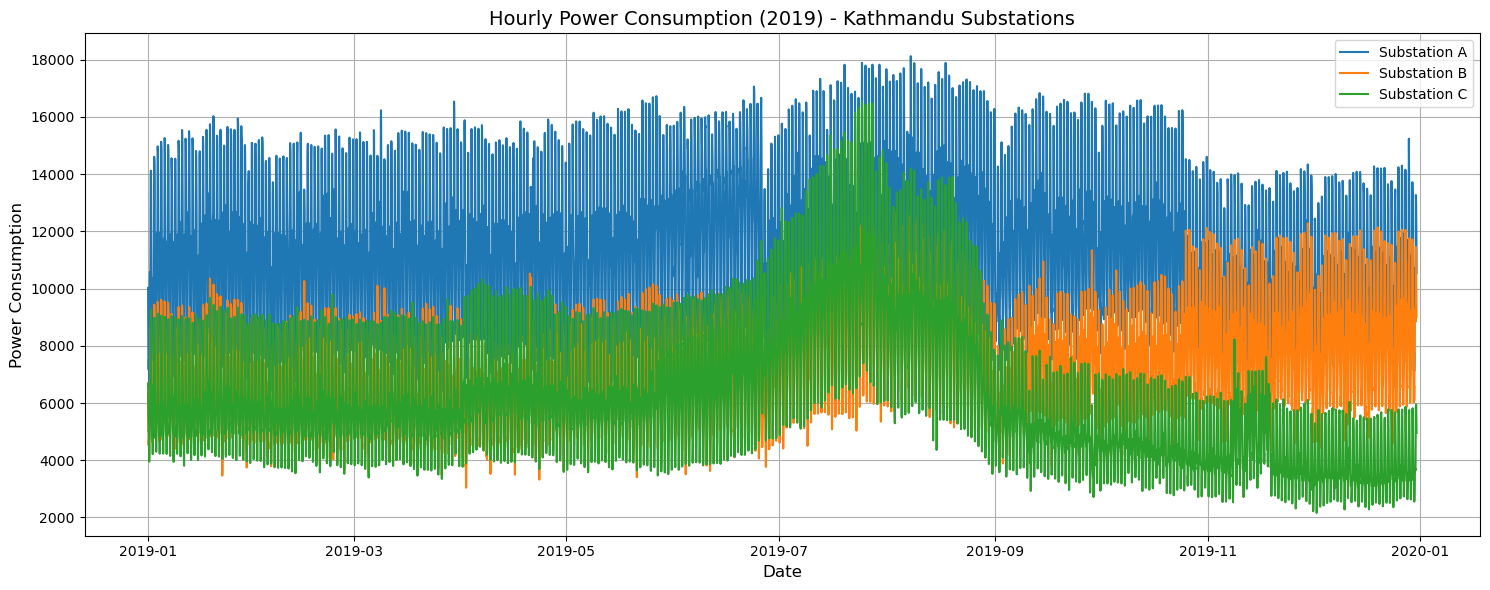

In [51]:
import matplotlib.pyplot as plt
# Convert DateTime to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])
# Filter data for the year 2019
data_2019 = data[data['DateTime'].dt.year == 2019]
# Set DateTime as index
data_2019 = data_2019.set_index('DateTime')
# Resample to Hourly mean
hourly_data = data_2019.resample('H').mean()
# Plot
plt.figure(figsize=(15, 6))
plt.plot(hourly_data.index, hourly_data['Kathmandu Substation A'], label='Substation A')
plt.plot(hourly_data.index, hourly_data['Kathmandu Substation B'], label='Substation B')
plt.plot(hourly_data.index, hourly_data['Kathmandu Substation C'], label='Substation C')
plt.title("Hourly Power Consumption (2019) - Kathmandu Substations", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Power Consumption", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
# Convert 'DateTime' to datetime type
data['DateTime'] = pd.to_datetime(data['DateTime'])
# Set 'DateTime' as index (optional, helps with plotting)
data.set_index('DateTime')

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Kathmandu Substation A,Kathmandu Substation B,Kathmandu Substation C
DateTime,,,,,,,,
2019-01-01 00:01:00,6.3,80.5,0.0,0.0,0.0,11919.493670,5645.106383,7084.337351
2019-01-01 00:02:00,6.4,80.5,0.0,0.0,0.0,11771.058227,5758.723404,7080.491568
2019-01-01 00:03:00,6.4,80.4,0.0,0.0,0.0,11622.622784,5872.340426,7076.645785
2019-01-01 00:04:00,6.4,80.4,0.0,0.0,0.0,11474.187341,5985.957447,7072.800001
2019-01-01 00:05:00,6.3,80.2,0.0,0.0,0.0,11325.751898,6099.574468,7068.954218
...,...,...,...,...,...,...,...,...
2019-12-30 23:47:00,5.7,80.1,0.0,0.0,0.0,10007.604563,8508.511814,4694.319328
2019-12-30 23:48:00,5.7,80.0,0.0,0.0,0.0,9986.311788,8486.216632,4688.470588
2019-12-30 23:49:00,5.7,80.3,0.0,0.0,0.0,9965.019012,8463.921449,4682.621849


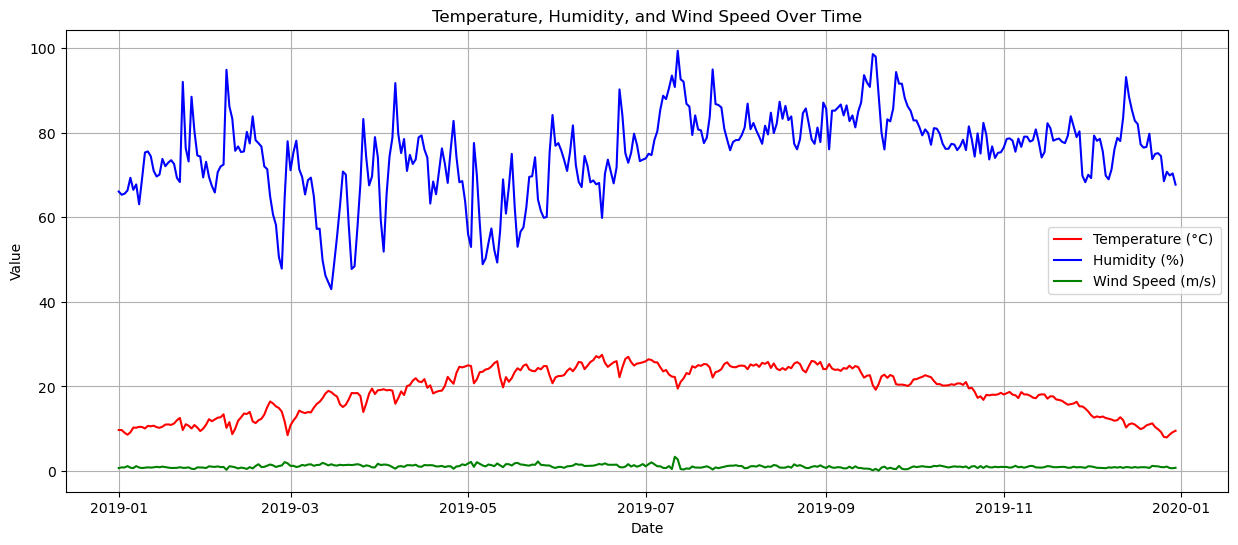

In [53]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
# Set DateTime as index
data.set_index('DateTime', inplace=True)
# Resample to daily mean to make the plot readable
daily_data = data[['Temperature', 'Humidity', 'Wind Speed']].resample('D').mean()
# Plotting
plt.figure(figsize=(15,6))
plt.plot(daily_data.index, daily_data['Temperature'], label='Temperature (°C)', color='red')
plt.plot(daily_data.index, daily_data['Humidity'], label='Humidity (%)', color='blue')
plt.plot(daily_data.index, daily_data['Wind Speed'], label='Wind Speed (m/s)', color='green')
plt.title('Temperature, Humidity, and Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Acer Aspire\AppData\Local\Temp\ipykernel_21328\398701008.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Acer Aspire\Downloads\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


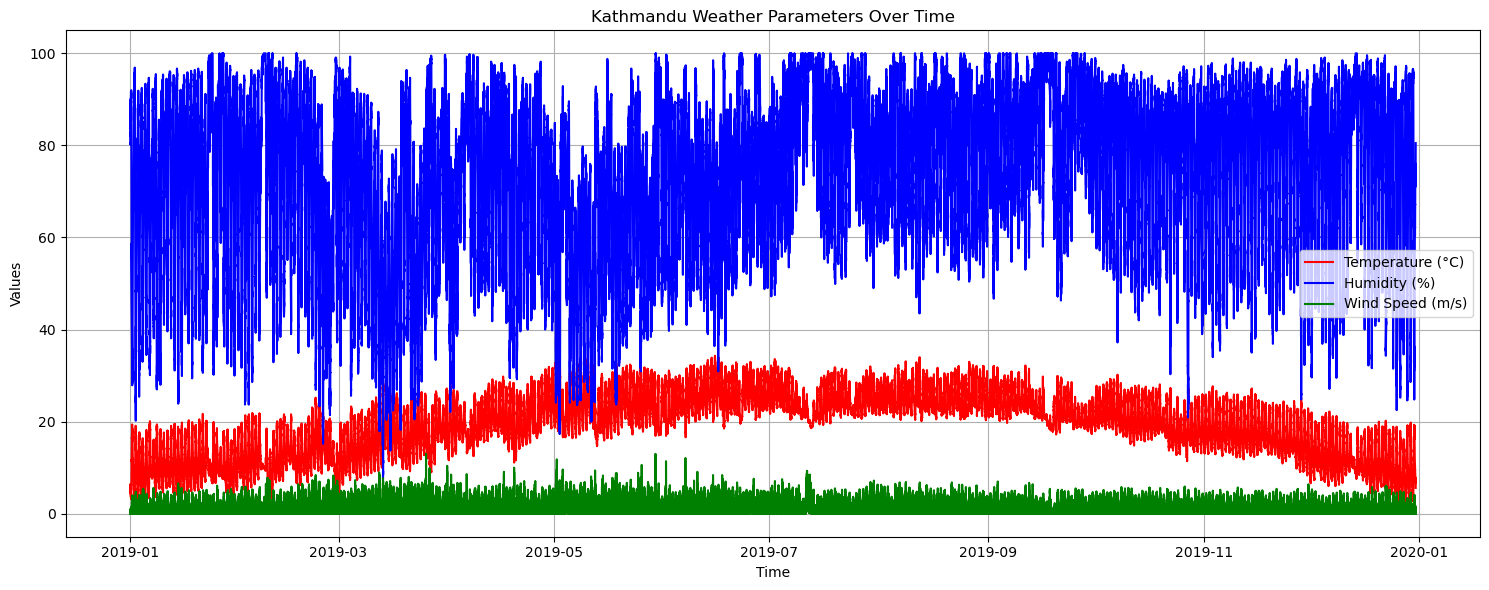

In [54]:
# Plot Temperature, Humidity, Wind Speed
plt.figure(figsize=(15,6))
plt.plot(data.index, data['Temperature'], label='Temperature (°C)', color='red')
plt.plot(data.index, data['Humidity'], label='Humidity (%)', color='blue')
plt.plot(data.index, data['Wind Speed'], label='Wind Speed (m/s)', color='green')
plt.title('Kathmandu Weather Parameters Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

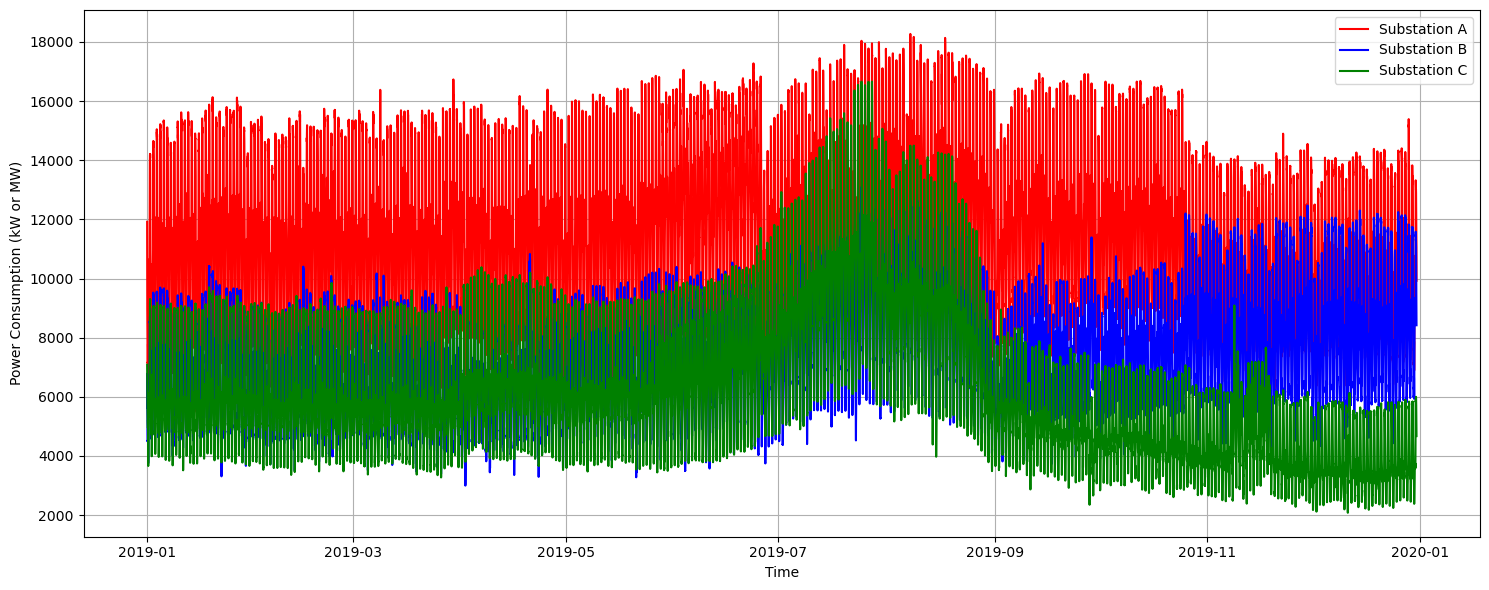

In [55]:
# Plot Power Consumption for three substations
plt.figure(figsize=(15,6))
plt.plot(data.index, data['Kathmandu Substation A'], label='Substation A', color='red')
plt.plot(data.index, data['Kathmandu Substation B'], label='Substation B', color='blue')
plt.plot(data.index, data['Kathmandu Substation C'], label='Substation C', color='green')
plt.xlabel('Time')
plt.ylabel('Power Consumption (kW or MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

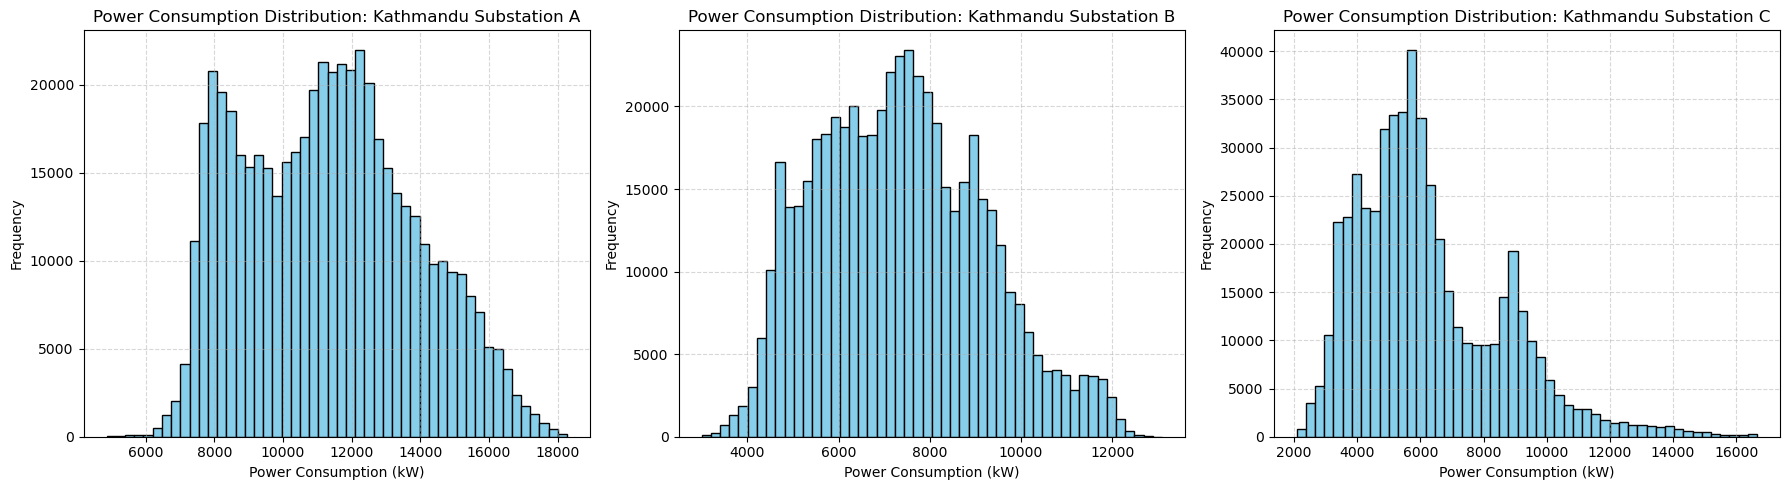

In [56]:
# Columns for the three zones
zones = ['Kathmandu Substation A', 'Kathmandu Substation B', 'Kathmandu Substation C']
# Plot histograms
plt.figure(figsize=(18,5))

for i, zone in enumerate(zones, 1):
    plt.subplot(1, 3, i)
    plt.hist(data[zone], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Power Consumption Distribution: {zone}')
    plt.xlabel('Power Consumption (kW)')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [57]:
import pandas as pd
# Load dataset
data = pd.read_csv("Kathmandu_power_consumption_1min_equivalent.csv")
# Convert DateTime to datetime
data['DateTime'] = pd.to_datetime(data['DateTime'])
# Set DateTime as index
data = data.set_index('DateTime')
# Create time-series features
data['year']        = data.index.year
data['month']       = data.index.month
data['day']         = data.index.day
data['hour']        = data.index.hour
data['minute']      = data.index.minute
data['dayofyear']   = data.index.dayofyear
data['weekofyear']  = data.index.isocalendar().week  # modern pandas method
data['quarter']     = data.index.quarter
data['dayofmonth']  = data.index.day

# Season (Winter, Spring, Summer, Autumn)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
data['season'] = data.index.month.map(get_season)
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Kathmandu Substation A,Kathmandu Substation B,Kathmandu Substation C,year,month,day,hour,minute,dayofyear,weekofyear,quarter,dayofmonth,season
DateTime,,,,,,,,,,,,,,,,,,
2019-01-01 00:01:00,6.3,80.5,0.0,0.0,0.0,11919.493670,5645.106383,7084.337351,2019,1,1,0,1,1,1,1,1,Winter
2019-01-01 00:02:00,6.4,80.5,0.0,0.0,0.0,11771.058227,5758.723404,7080.491568,2019,1,1,0,2,1,1,1,1,Winter
2019-01-01 00:03:00,6.4,80.4,0.0,0.0,0.0,11622.622784,5872.340426,7076.645785,2019,1,1,0,3,1,1,1,1,Winter
2019-01-01 00:04:00,6.4,80.4,0.0,0.0,0.0,11474.187341,5985.957447,7072.800001,2019,1,1,0,4,1,1,1,1,Winter
2019-01-01 00:05:00,6.3,80.2,0.0,0.0,0.0,11325.751898,6099.574468,7068.954218,2019,1,1,0,5,1,1,1,1,Winter


In [58]:
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Kathmandu Substation A,Kathmandu Substation B,Kathmandu Substation C,year,month,day,hour,minute,dayofyear,weekofyear,quarter,dayofmonth,season
DateTime,,,,,,,,,,,,,,,,,,
2019-01-01 00:01:00,6.3,80.5,0.0,0.0,0.0,11919.493670,5645.106383,7084.337351,2019,1,1,0,1,1,1,1,1,Winter
2019-01-01 00:02:00,6.4,80.5,0.0,0.0,0.0,11771.058227,5758.723404,7080.491568,2019,1,1,0,2,1,1,1,1,Winter
2019-01-01 00:03:00,6.4,80.4,0.0,0.0,0.0,11622.622784,5872.340426,7076.645785,2019,1,1,0,3,1,1,1,1,Winter
2019-01-01 00:04:00,6.4,80.4,0.0,0.0,0.0,11474.187341,5985.957447,7072.800001,2019,1,1,0,4,1,1,1,1,Winter
2019-01-01 00:05:00,6.3,80.2,0.0,0.0,0.0,11325.751898,6099.574468,7068.954218,2019,1,1,0,5,1,1,1,1,Winter


In [59]:
data[[ 'year', 'month', 'day','minute', 'dayofyear', 'weekofyear', 'quarter', 'season']].head()

,year,month,day,minute,dayofyear,weekofyear,quarter,season
DateTime,,,,,,,,
2019-01-01 00:01:00,2019,1,1,1,1,1,1,Winter
2019-01-01 00:02:00,2019,1,1,2,1,1,1,Winter
2019-01-01 00:03:00,2019,1,1,3,1,1,1,Winter
2019-01-01 00:04:00,2019,1,1,4,1,1,1,Winter
2019-01-01 00:05:00,2019,1,1,5,1,1,1,Winter


In [60]:
data.columns.tolist()

['Temperature',
 'Humidity',
 'Wind Speed',
 'general diffuse flows',
 'diffuse flows',
 'Kathmandu Substation A',
 'Kathmandu Substation B',
 'Kathmandu Substation C',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'dayofyear',
 'weekofyear',
 'quarter',
 'dayofmonth',
 'season']

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

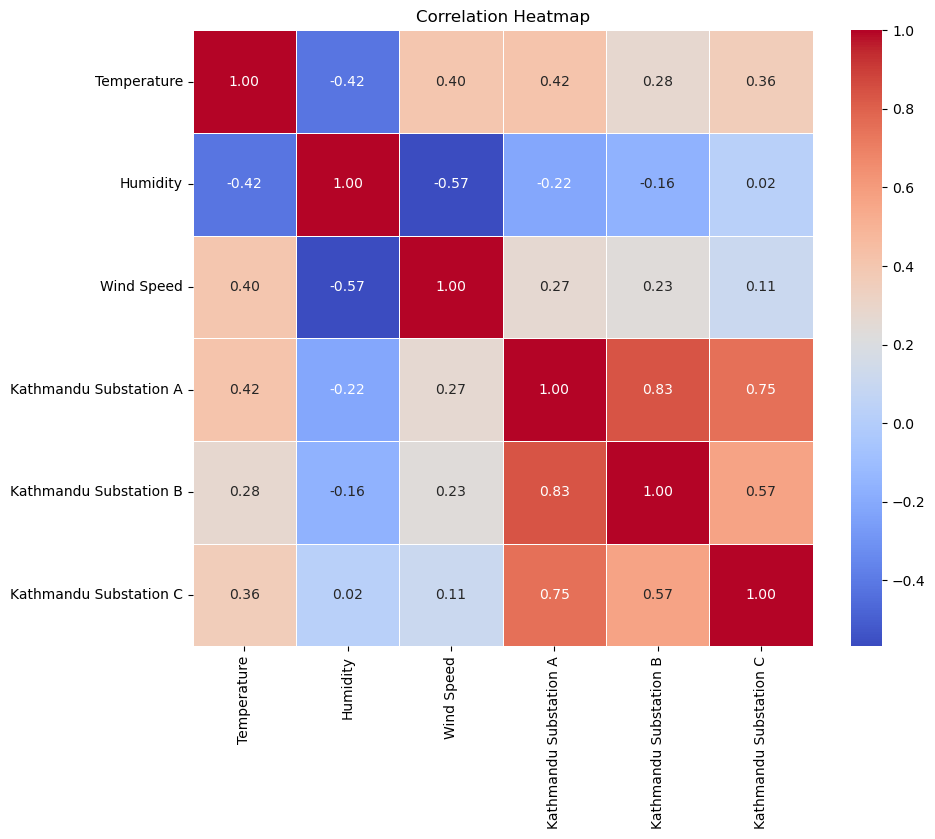

In [62]:
# Calculate correlation matrix
correlation_matrix = data[['Temperature', 'Humidity', 'Wind Speed', 'Kathmandu Substation A', 'Kathmandu Substation B', 'Kathmandu Substation C']].corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [63]:
data[['Temperature', 'Humidity', 'Wind Speed', 'Kathmandu Substation A', 'Kathmandu Substation B', 'Kathmandu Substation C']].corr()

,Temperature,Humidity,Wind Speed,Kathmandu Substation A,Kathmandu Substation B,Kathmandu Substation C
Temperature,1.000000,-0.418990,0.402464,0.415347,0.275936,0.361806
Humidity,-0.418990,1.000000,-0.568007,-0.217537,-0.162568,0.021853
Wind Speed,0.402464,-0.568007,1.000000,0.268688,0.229561,0.107472
Kathmandu Substation A,0.415347,-0.217537,0.268688,1.000000,0.834686,0.750820
Kathmandu Substation B,0.275936,-0.162568,0.229561,0.834686,1.000000,0.570879
Kathmandu Substation C,0.361806,0.021853,0.107472,0.750820,0.570879,1.000000


In [64]:
import pandas as pd
#Columns to check
numerical_cols = ['Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows',
                  'Kathmandu Substation A','Kathmandu Substation B','Kathmandu Substation C']
# Calculate IQR
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
# Detect outliers
outliers_iqr = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR)))

In [65]:
for col in numerical_cols:
    lower = Q1[col] - 1.5*IQR[col]
    upper = Q3[col] + 1.5*IQR[col]
    data[col] = data[col].clip(lower, upper)

In [66]:
# Re-check outliers
outliers_iqr_after = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR)))
print("Number of outliers per column after handling:")
print(outliers_iqr_after.sum())

Number of outliers per column after handling:
Temperature               0
Humidity                  0
Wind Speed                0
general diffuse flows     0
diffuse flows             0
Kathmandu Substation A    0
Kathmandu Substation B    0
Kathmandu Substation C    0
dtype: int64


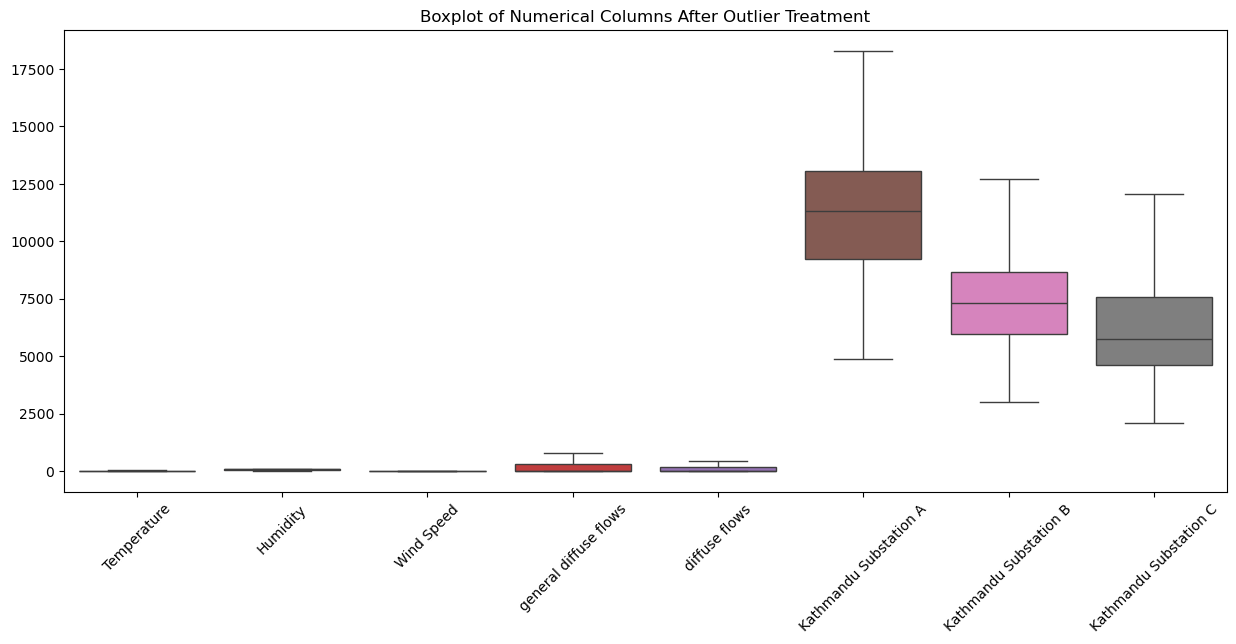

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
sns.boxplot(data=data[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Columns After Outlier Treatment")
plt.show()

In [68]:
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Kathmandu Substation A,Kathmandu Substation B,Kathmandu Substation C,year,month,day,hour,minute,dayofyear,weekofyear,quarter,dayofmonth,season
DateTime,,,,,,,,,,,,,,,,,,
2019-01-01 00:01:00,6.3,80.5,0.0,0.0,0.0,11919.493670,5645.106383,7084.337351,2019,1,1,0,1,1,1,1,1,Winter
2019-01-01 00:02:00,6.4,80.5,0.0,0.0,0.0,11771.058227,5758.723404,7080.491568,2019,1,1,0,2,1,1,1,1,Winter
2019-01-01 00:03:00,6.4,80.4,0.0,0.0,0.0,11622.622784,5872.340426,7076.645785,2019,1,1,0,3,1,1,1,1,Winter
2019-01-01 00:04:00,6.4,80.4,0.0,0.0,0.0,11474.187341,5985.957447,7072.800001,2019,1,1,0,4,1,1,1,1,Winter
2019-01-01 00:05:00,6.3,80.2,0.0,0.0,0.0,11325.751898,6099.574468,7068.954218,2019,1,1,0,5,1,1,1,1,Winter


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [70]:
data.columns.tolist()

['Temperature',
 'Humidity',
 'Wind Speed',
 'general diffuse flows',
 'diffuse flows',
 'Kathmandu Substation A',
 'Kathmandu Substation B',
 'Kathmandu Substation C',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'dayofyear',
 'weekofyear',
 'quarter',
 'dayofmonth',
 'season']

In [71]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Kathmandu Substation A,Kathmandu Substation B,Kathmandu Substation C,year,month,day,hour,minute,dayofyear,weekofyear,quarter,dayofmonth
count,524151.000000,524151.000000,524151.000000,524151.00000,524151.000000,524151.000000,524151.000000,524151.000000,524151.0,524151.000000,524151.000000,524151.000000,524151.000000,524151.000000,524151.0,524151.000000,524151.000000
mean,19.026159,75.107937,1.053014,179.15279,90.848375,11320.746562,7364.874417,6208.233734,2019.0,6.510916,15.678381,11.499846,29.499659,182.497576,26.500438,2.505475,15.678381
std,6.543360,18.468407,1.222355,261.11149,124.277747,2494.074194,1819.515298,2211.748977,0.0,3.440567,8.771620,6.922089,17.317919,105.075663,15.008102,1.115554,8.771620
min,1.700000,19.650000,0.000000,0.00000,0.000000,4863.493670,2996.028513,2077.310925,2019.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000
25%,14.400000,62.100000,0.000000,0.00000,0.000000,9210.858077,5943.742204,4594.210334,2019.0,4.000000,8.000000,5.000000,14.000000,91.000000,14.0,2.000000,8.000000
50%,19.900000,79.700000,0.600000,0.00000,0.000000,11296.034041,7288.995869,5745.193548,2019.0,7.000000,16.000000,11.000000,29.000000,182.000000,27.0,3.000000,16.000000
75%,23.600000,90.400000,1.700000,315.30000,167.200000,13057.644526,8650.005230,7569.348387,2019.0,9.000000,23.000000,17.000000,44.000000,273.000000,40.0,3.000000,23.000000
max,34.300000,100.000000,4.250000,788.25000,418.000000,18271.538292,12709.399770,12032.055465,2019.0,12.000000,31.000000,23.000000,59.000000,364.000000,52.0,4.000000,31.000000


In [72]:
data['Total_Load'] = (data['Kathmandu Substation A'] +
                      data['Kathmandu Substation B'] +
                      data['Kathmandu Substation C'])

In [73]:
import numpy as np
data['Load_Class'] = pd.qcut(data['Total_Load'], q=2,
                             labels=[0,1])

In [74]:
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Kathmandu Substation A,Kathmandu Substation B,Kathmandu Substation C,year,month,day,hour,minute,dayofyear,weekofyear,quarter,dayofmonth,season,Total_Load,Load_Class
DateTime,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:01:00,6.3,80.5,0.0,0.0,0.0,11919.493670,5645.106383,7084.337351,2019,1,1,0,1,1,1,1,1,Winter,24648.937404,1
2019-01-01 00:02:00,6.4,80.5,0.0,0.0,0.0,11771.058227,5758.723404,7080.491568,2019,1,1,0,2,1,1,1,1,Winter,24610.273199,1
2019-01-01 00:03:00,6.4,80.4,0.0,0.0,0.0,11622.622784,5872.340426,7076.645785,2019,1,1,0,3,1,1,1,1,Winter,24571.608994,1
2019-01-01 00:04:00,6.4,80.4,0.0,0.0,0.0,11474.187341,5985.957447,7072.800001,2019,1,1,0,4,1,1,1,1,Winter,24532.944789,1
2019-01-01 00:05:00,6.3,80.2,0.0,0.0,0.0,11325.751898,6099.574468,7068.954218,2019,1,1,0,5,1,1,1,1,Winter,24494.280584,1


In [75]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Kathmandu Substation A,Kathmandu Substation B,Kathmandu Substation C,year,month,day,hour,minute,dayofyear,weekofyear,quarter,dayofmonth,Total_Load
count,524151.000000,524151.000000,524151.000000,524151.00000,524151.000000,524151.000000,524151.000000,524151.000000,524151.0,524151.000000,524151.000000,524151.000000,524151.000000,524151.000000,524151.0,524151.000000,524151.000000,524151.000000
mean,19.026159,75.107937,1.053014,179.15279,90.848375,11320.746562,7364.874417,6208.233734,2019.0,6.510916,15.678381,11.499846,29.499659,182.497576,26.500438,2.505475,15.678381,24893.854713
std,6.543360,18.468407,1.222355,261.11149,124.277747,2494.074194,1819.515298,2211.748977,0.0,3.440567,8.771620,6.922089,17.317919,105.075663,15.008102,1.115554,8.771620,5904.570391
min,1.700000,19.650000,0.000000,0.00000,0.000000,4863.493670,2996.028513,2077.310925,2019.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,12874.763909
25%,14.400000,62.100000,0.000000,0.00000,0.000000,9210.858077,5943.742204,4594.210334,2019.0,4.000000,8.000000,5.000000,14.000000,91.000000,14.0,2.000000,8.000000,19776.449343
50%,19.900000,79.700000,0.600000,0.00000,0.000000,11296.034041,7288.995869,5745.193548,2019.0,7.000000,16.000000,11.000000,29.000000,182.000000,27.0,3.000000,16.000000,24427.854425
75%,23.600000,90.400000,1.700000,315.30000,167.200000,13057.644526,8650.005230,7569.348387,2019.0,9.000000,23.000000,17.000000,44.000000,273.000000,40.0,3.000000,23.000000,29307.243443
max,34.300000,100.000000,4.250000,788.25000,418.000000,18271.538292,12709.399770,12032.055465,2019.0,12.000000,31.000000,23.000000,59.000000,364.000000,52.0,4.000000,31.000000,42948.831348


In [76]:
data['Load_Class'].value_counts()

Load_Class
0    262076
1    262075
Name: count, dtype: int64

In [77]:
X = data.drop(columns=['year', 'season', 'Kathmandu Substation A', 'Kathmandu Substation B',
 'Kathmandu Substation C', 'Load_Class', 'Total_Load'], axis=1)
y = data['Load_Class']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42, 
                                                    stratify=y)  # stratify to maintain class proportions

In [79]:
X_test.value_counts()

Temperature  Humidity  Wind Speed  general diffuse flows  diffuse flows  month  day  hour  minute  dayofyear  weekofyear  quarter  dayofmonth
34.2         19.65     3.3         701.1                  197.0          5      2    14    56      122        18          2        2             1
1.7          87.20     0.0         0.0                    0.0            12     26   6     48      360        52          4        26            1
             89.60     0.4         0.0                    0.0            12     26   6     52      360        52          4        26            1
1.9          89.50     1.5         0.5                    0.0            12     26   6     55      360        52          4        26            1
2.1          86.40     0.0         0.0                    0.0            12     26   6     44      360        52          4        26            1
                                                                                                                           

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# Multi-class Logistic Regression (One-vs-Rest)
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train_scaled, y_train)

C:\Users\Acer Aspire\Downloads\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [82]:
# Predict
y_pred_lg = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_lg))
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lg))
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lg))

Accuracy: 0.8174013412063226
Confusion Matrix:
 [[42772  9644]
 [ 9498 42917]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82     52416
           1       0.82      0.82      0.82     52415

    accuracy                           0.82    104831
   macro avg       0.82      0.82      0.82    104831
weighted avg       0.82      0.82      0.82    104831



In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [84]:
dt = DecisionTreeClassifier(
    criterion='gini',       # or 'entropy'
    max_depth=10,           # limit depth to prevent overfitting
    min_samples_split=50,
    random_state=42
)

dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=50, random_state=42)

In [85]:
y_pred_dt = dt.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.9525331247436349

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     52416
           1       0.94      0.97      0.95     52415

    accuracy                           0.95    104831
   macro avg       0.95      0.95      0.95    104831
weighted avg       0.95      0.95      0.95    104831

Confusion Matrix:
 [[49097  3319]
 [ 1657 50758]]


In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Initialize LDA
lda = LinearDiscriminantAnalysis(solver='svd')

# Fit the model
lda.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_ld = lda.predict(X_test_scaled)


In [87]:
print("Accuracy:", accuracy_score(y_test, y_pred_ld))
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ld))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ld))


Accuracy: 0.8278181072392709
Confusion Matrix:
[[42746  9670]
 [ 8380 44035]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     52416
           1       0.82      0.84      0.83     52415

    accuracy                           0.83    104831
   macro avg       0.83      0.83      0.83    104831
weighted avg       0.83      0.83      0.83    104831



In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [89]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("📌 RANDOM FOREST RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

📌 RANDOM FOREST RESULTS
Accuracy: 0.9968616153618681

Confusion Matrix:
 [[52224   192]
 [  137 52278]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52416
           1       1.00      1.00      1.00     52415

    accuracy                           1.00    104831
   macro avg       1.00      1.00      1.00    104831
weighted avg       1.00      1.00      1.00    104831



In [90]:
!pip install xgboost

In [91]:
from xgboost import XGBClassifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
print("📌 GRADIENT BOOSTING RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

📌 GRADIENT BOOSTING RESULTS
Accuracy: 0.9249649435758507

Confusion Matrix:
 [[47420  4996]
 [ 2870 49545]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     52416
           1       0.91      0.95      0.93     52415

    accuracy                           0.92    104831
   macro avg       0.93      0.92      0.92    104831
weighted avg       0.93      0.92      0.92    104831



In [93]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("📌 XGBOOST RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


📌 XGBOOST RESULTS
Accuracy: 0.9736242142114451

Confusion Matrix:
 [[50554  1862]
 [  903 51512]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     52416
           1       0.97      0.98      0.97     52415

    accuracy                           0.97    104831
   macro avg       0.97      0.97      0.97    104831
weighted avg       0.97      0.97      0.97    104831



In [94]:
def plot_confusion_matrix(y_true, y_pred, model_name, cmap_color):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_color, cbar=True, linewidths=0.5, linecolor='black')
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()

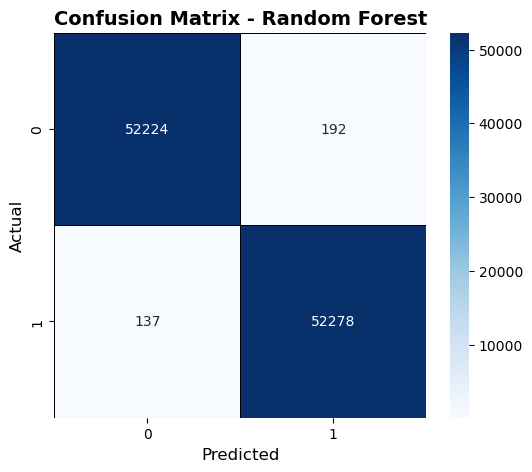

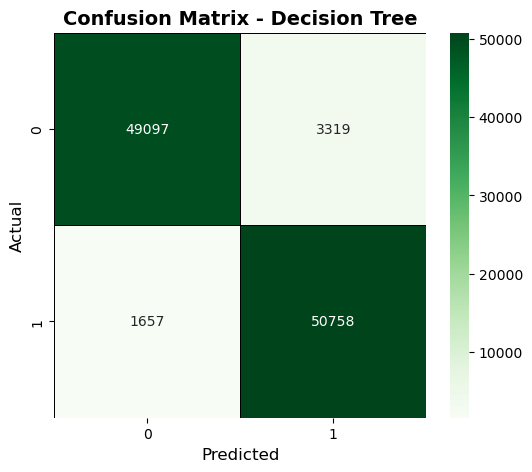

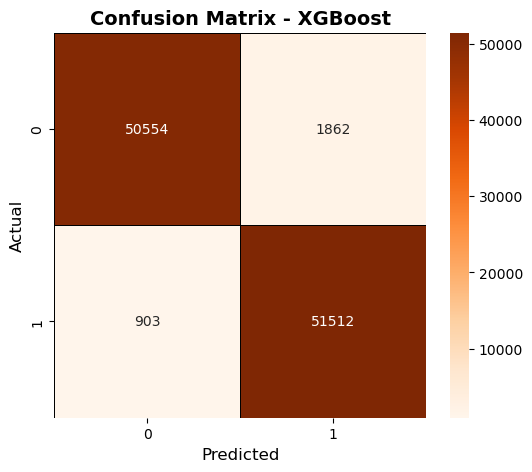

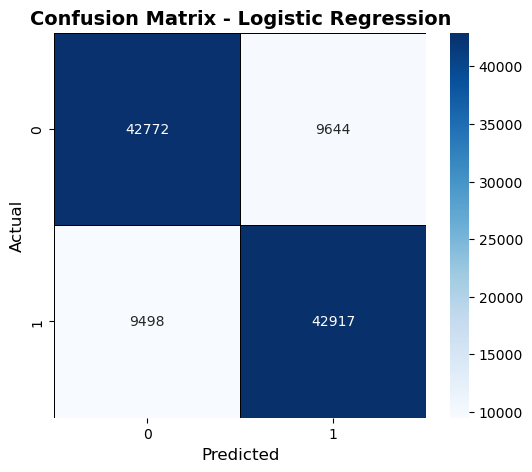

In [95]:
# Random Forest - Blues
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest", cmap_color="Blues")
# Decision Tree - Greens
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree", cmap_color="Greens")
# XGBoost - Oranges
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost", cmap_color="Oranges")
# Logistic Regression - red
plot_confusion_matrix(y_test, y_pred_lg, "Logistic Regression", cmap_color="Blues")

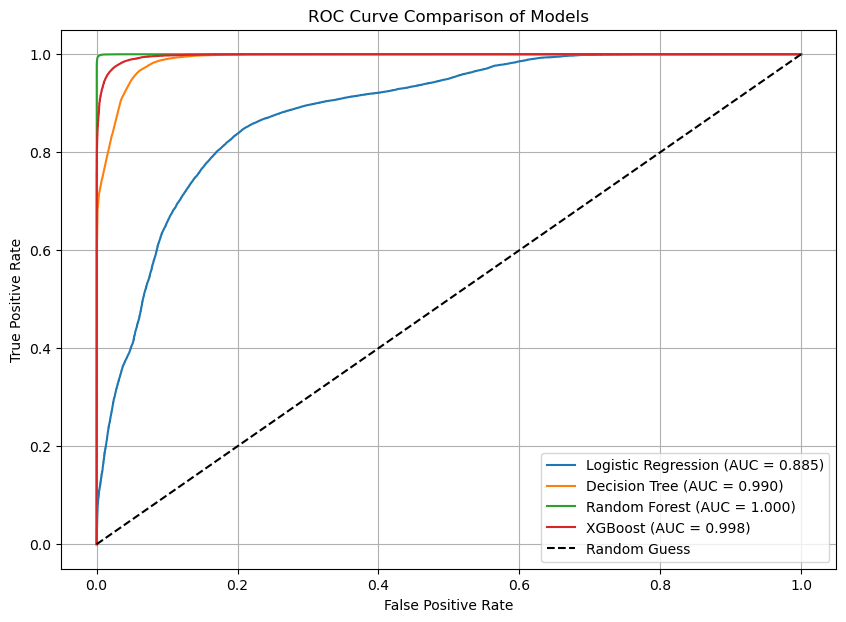

In [97]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# -----------------------------
# Get predicted probabilities
# -----------------------------

# Logistic Regression
y_prob_lg = model.predict_proba(X_test_scaled)[:, 1]

# Decision Tree
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

# Random Forest
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# XGBoost
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# -----------------------------
# Compute ROC and AUC for all models
# -----------------------------

fpr_lg, tpr_lg, _ = roc_curve(y_test, y_prob_lg)
roc_auc_lg = auc(fpr_lg, tpr_lg)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# -----------------------------
# Plot ROC curve
# -----------------------------

plt.figure(figsize=(10, 7))

plt.plot(fpr_lg,  tpr_lg,  label=f"Logistic Regression (AUC = {roc_auc_lg:.3f})")
plt.plot(fpr_dt,  tpr_dt,  label=f"Decision Tree (AUC = {roc_auc_dt:.3f})")
plt.plot(fpr_rf,  tpr_rf,  label=f"Random Forest (AUC = {roc_auc_rf:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.3f})")

# Diagonal Reference Line
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()